<a href="https://colab.research.google.com/github/MockingJay09/Stock_Predictions/blob/main/Stock_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Stock Predictions using Recurrent Neural Network
# - HARIKARTHIKEYAN.A
# - HARIVIKASH.M
# - KARHUNESH.A

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime

import matplotlib.pyplot as plt

import numpy as np


from sklearn.preprocessing import MinMaxScaler

# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Stock_dataset/RELIANCE.csv")

#print the head
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


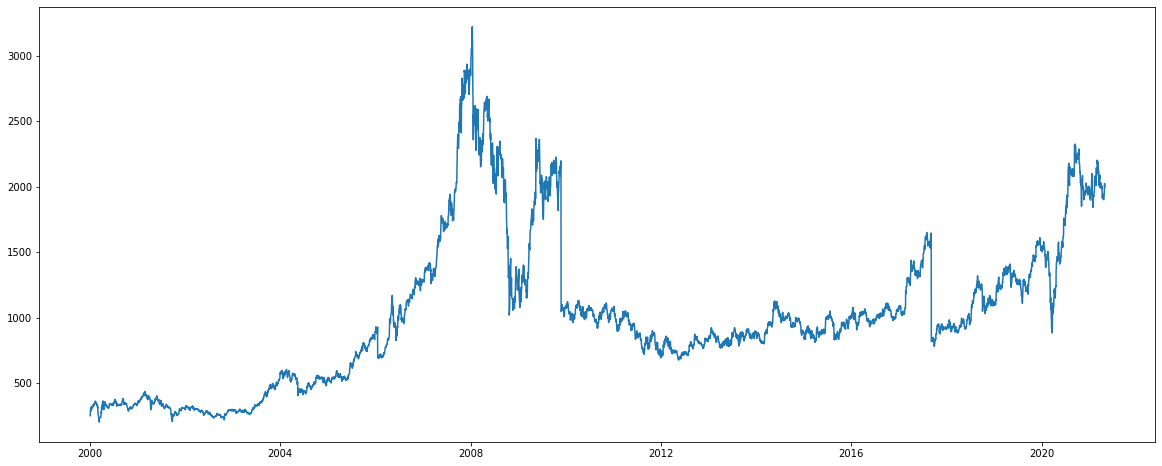

In [3]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(20,8))
plt.plot(df['Close'], label='Historical Close Price')

In [4]:
features = ["Date", "Close"]
all_data = df[features]


all_data.index = all_data.Date
all_data.drop('Date', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
all_data.head()

,Close
Date,
2000-01-03,251.70
2000-01-04,271.85
2000-01-05,282.50
2000-01-06,294.35
2000-01-07,314.55


In [6]:
#creating training and validation sets
dataset = all_data.values

train = dataset[2000:4500,:]
valid = dataset[4500:,:]

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01607211],
       [0.02274949],
       [0.02627873],
       ...,
       [0.59453548],
       [0.6034    ],
       [0.59360761]])

In [8]:
x_train, y_train = [], []
x_test, y_test = [], []

for i in range(90,len(train)):
    x_train.append(scaled_data[i-90:i,0])
    y_train.append(scaled_data[i,0])

for i in range(90,len(valid)):
    x_test.append(scaled_data[i-90:i,0])
    y_test.append(scaled_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test),np.array(y_test)

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [28]:
# create and fit the LSTM network
model = Sequential()

#Adding the input LSTM network layer
model.add(LSTM(128, input_shape=(x_train.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

#Adding a second LSTM network layer
model.add(LSTM(128))

#Adding a dense hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

#Adding the output layer
model.add(Dense(1))


In [29]:
model.compile( loss='mean_squared_logarithmic_error',
              optimizer=Adam(lr=0.001))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [30]:
model.fit(x_train,
         y_train,
          epochs=50,
          validation_data=(x_test, y_test))

Epoch 1/50
76/76 [==============================] - 21s 221ms/step - loss: 0.0042 - val_loss: 1.8594e-04
Epoch 2/50
76/76 [==============================] - 17s 221ms/step - loss: 0.0012 - val_loss: 4.8717e-05
Epoch 3/50
76/76 [==============================] - 18s 235ms/step - loss: 9.1159e-04 - val_loss: 2.9827e-05
Epoch 4/50
76/76 [==============================] - 16s 209ms/step - loss: 0.0011 - val_loss: 8.1104e-05
Epoch 5/50
76/76 [==============================] - 16s 209ms/step - loss: 9.5659e-04 - val_loss: 1.0177e-04
Epoch 6/50
76/76 [==============================] - 16s 210ms/step - loss: 8.4968e-04 - val_loss: 5.5631e-05
Epoch 7/50
76/76 [==============================] - 16s 209ms/step - loss: 7.6240e-04 - val_loss: 8.9585e-05
Epoch 8/50
76/76 [==============================] - 17s 222ms/step - loss: 7.8537e-04 - val_loss: 1.4841e-04
Epoch 9/50
76/76 [==============================] - 16s 208ms/step - loss: 7.4446e-04 - val_loss: 4.6566e-05
Epoch 10/50
76/76 [============

In [31]:
inputs = all_data[len(all_data) - len(valid)-90:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [32]:
inputs.shape

(896, 1)

In [33]:
X_test = []
for i in range(90,inputs.shape[0]):
    X_test.append(inputs[i-90:i,0])

X_test = np.array(X_test)

In [34]:
X_test

array([[0.21162163, 0.21286431, 0.2105612 , ..., 0.24128047, 0.25460209,
        0.25849585],
       [0.21286431, 0.2105612 , 0.21339453, ..., 0.25460209, 0.25849585,
        0.25289547],
       [0.2105612 , 0.21339453, 0.2114725 , ..., 0.25849585, 0.25289547,
        0.25274634],
       ...,
       [0.59254718, 0.58693023, 0.58765927, ..., 0.56373337, 0.57483472,
        0.59166901],
       [0.58693023, 0.58765927, 0.59065829, ..., 0.57483472, 0.59166901,
        0.59453548],
       [0.58765927, 0.59065829, 0.59263003, ..., 0.59166901, 0.59453548,
        0.6034    ]])

In [35]:
X_test.shape

(806, 90)

In [36]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
preds = model.predict(X_test)

preds = scaler.inverse_transform(preds)

In [37]:
preds.shape

(806, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


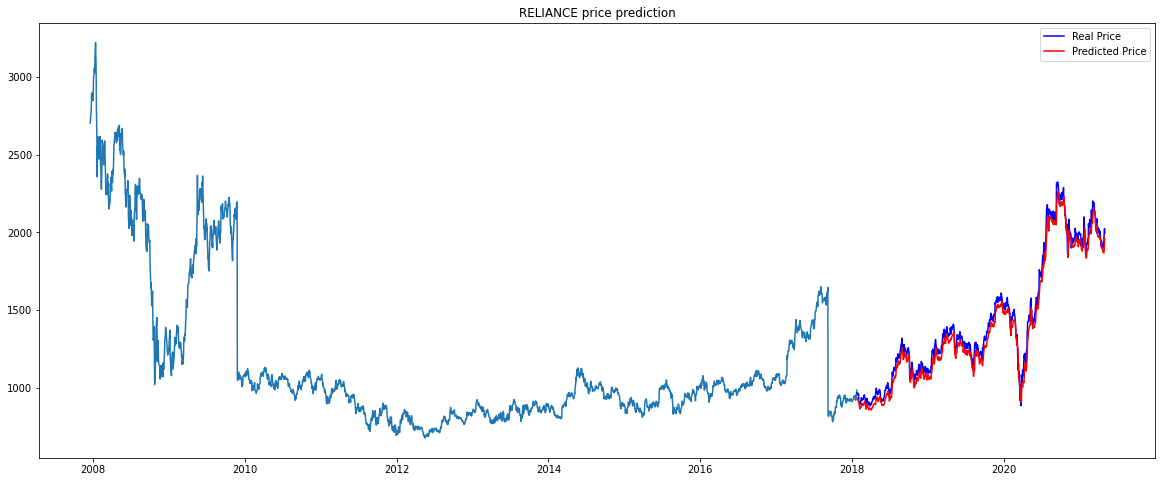

In [38]:
#for plotting
train = all_data[2000:4500]
valid = all_data[4500:]

valid['Predictions'] = preds

plt.figure(figsize=(20,8))

plt.plot(train['Close'])
plt.plot(valid['Close'], color = 'blue', label = 'Real Price')
plt.plot(valid['Predictions'], color = 'red', label = 'Predicted Price')

plt.title('RELIANCE price prediction')
plt.legend()
plt.show()